# Part 6 | Reinforcement Learning

In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Seção 27 | Upper Confidence Bound

In [2]:
# Importing the dataset

dss27 = pd.read_csv('C:\\Users\\rafae\\Dropbox\\Data_Science\\Cursos\\A_to_Z\\Part 6 - Reinforcement Learning\\Section 32 - Upper Confidence Bound (UCB)\\Ads_CTR_Optimisation.csv')

In [3]:
dss27.head()

# 'God's know'

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [4]:
# Implementing UCB

import math
N = 10000
d = 10
ads_selected = []

# Step 1
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0

# Step 2
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n+1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dss27.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

In [5]:
total_reward

2178

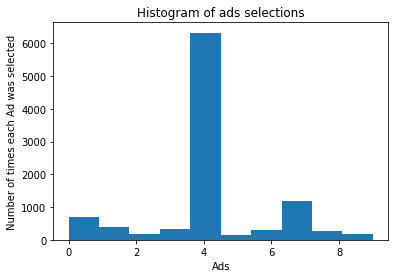

In [6]:
# Visualising the results

plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each Ad was selected')
plt.show()

### Seção 28 | Thompsom Sampling

In [7]:
dss28 = pd.read_csv('C:\\Users\\rafae\\Dropbox\\Data_Science\\Cursos\\A_to_Z\\Part 6 - Reinforcement Learning\\Section 33 - Thompson Sampling\\Ads_CTR_Optimisation.csv')

In [8]:
dss28.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [9]:
# Implementing Thompson Sampling

import random
N = 10000
d = 10
ads_selected = []

# Step 1
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0

# Step 2
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dss27.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

In [10]:
total_reward

2613

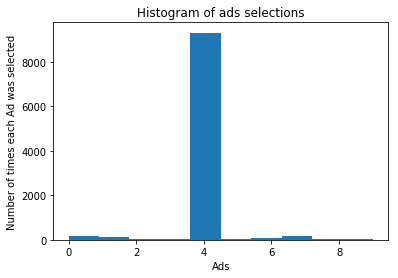

In [11]:
# Visualising the results

plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each Ad was selected')
plt.show()